In [3]:
from values import *
from utils import *
import matplotlib.pyplot as plt 
from datetime import datetime

%load_ext autoreload
%autoreload 2

$\Delta_{0000}^{00}= \langle\chi_{00}(x, y)\psi(z)|(\acute{V}(x,y,z)+V_l(z))e^{-2ik_0z}|\chi_{00}(x, y)\psi(z)\rangle$      
$ =  \langle \psi(z) | V_l(z) e^{-2ik_0z} | \psi(z) \rangle$  $+ \langle\chi_{00}(x, y)\psi(z)|(\acute{V}(x,y,z)e^{-2ik_0z}|\chi_{00}(x, y)\psi(z)\rangle$ 


In [4]:
electric_field_sketch = np.linspace(1, 11, num = 100) # mV/nm 


In [7]:
# k=2|cos (\phi_00 - \phi_b) |=1 -> minimum fluctuation 
# Irregular pattern at 16 <- when |\Delta_0000| goes to zero, it blows up 
# Irregular patter at 21 <- when |\Delta_0000| goes to zero, it blows up
# Inflection point exists at 22 
# Rabi oscillation goes to zero <- when cos(\phi_00-\phi_b) goes to zero  
k =10
Rabi_freqs = np.load(f'./Results/F_z_{k}th_disorder_Rabi_frequencies.npy')
calculated_values = np.load(f"./Results/F_z_{k}th_disorder_calculated_exp_vs.npy")

### Check values again 

**2-5-1  Rabi frequency as a function of electric field $F_z$**

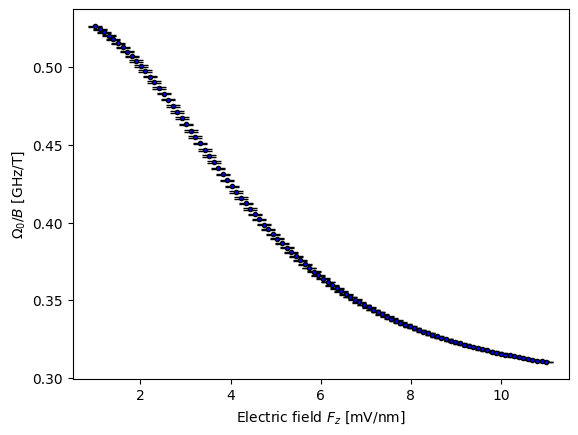

In [8]:
plt.errorbar(electric_field_sketch, np.abs(Rabi_freqs[:, 0]), yerr=[Rabi_freqs[:, 0]-Rabi_freqs[:, 1] , Rabi_freqs[:, 2]-Rabi_freqs[:, 0]], fmt='.', capsize=5, capthick=1,ecolor='black', markerfacecolor='blue', markeredgecolor='black')
plt.ylabel(r'$\Omega_0/B$'+' [GHz/T]')
plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.show()

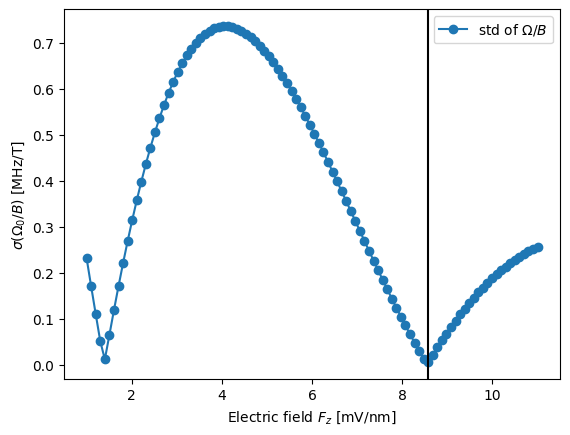

Min value at 8.575757575757574 mV/nm, the std is 0.0051881702971192595 MHz/T


In [52]:
plt.plot(electric_field_sketch, Rabi_freqs[:, 3]*10**3, '-o', label = 'std of '+r'$\Omega/B$')
min_value = electric_field_sketch[np.argmin(Rabi_freqs[:, 3])]
plt.axvline( x = min_value, color = 'k')
plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.ylabel(r'$\sigma(\Omega_0/B)$'+' [MHz/T]')
plt.legend()

plt.show() 

print(f'Min value at {min_value} mV/nm, the std is {np.min(Rabi_freqs[:, 3])*10**3} MHz/T')

**2-5-2  center, width of ground state profile $|\psi(z)|^2$ as a function of electric field $F_z$**

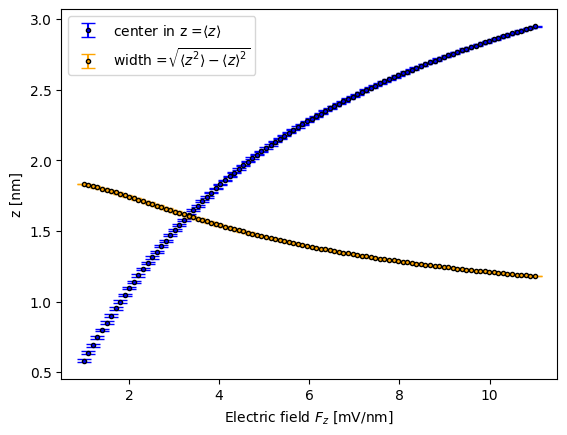

In [53]:
mean_z_loc = calculated_values[:, :, 3, 0].mean(axis = 1)
std_z_loc = calculated_values[:, :, 3, 0].std(axis = 1)

mean_z_width = calculated_values[:, :, 3, 1].mean(axis = 1)
std_z_width = calculated_values[:, :, 3, 1].std(axis = 1)

plt.errorbar(electric_field_sketch, mean_z_loc, yerr = [std_z_loc, std_z_loc],fmt='.', capsize=5, capthick=1,ecolor='blue', markerfacecolor='blue', markeredgecolor='black', label = 'center in z ='+r'$\langle z \rangle$')
plt.errorbar(electric_field_sketch, mean_z_width, yerr = [std_z_width, std_z_width],fmt='.', capsize=5, capthick=1,ecolor='orange', markerfacecolor='orange', markeredgecolor='black', label = 'width ='+r'$\sqrt{\langle z^2 \rangle-\langle z \rangle^2}$')

plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.ylabel('z [nm]')
plt.legend()

Text(0.5, 1.0, 'If electric field gets stronger, the ground state fluctuates less')

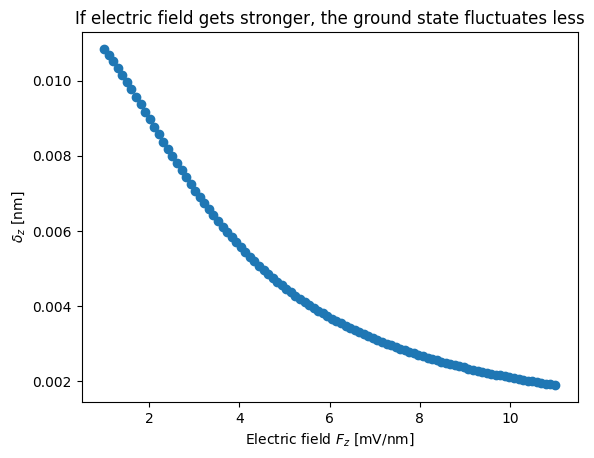

In [54]:
plt.plot(electric_field_sketch, std_z_loc, 'o')
plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.ylabel(r'$\delta_z$'+' [nm]')
plt.title('If electric field gets stronger, the ground state fluctuates less')

**2-5-3 $\Delta_{0000}$, $\Delta_{1000}$  as a function of electric field $F_z$**

If electric field increases, the ground state shrinks, the fluctuation of disorder increases -> valley splitting increases. 

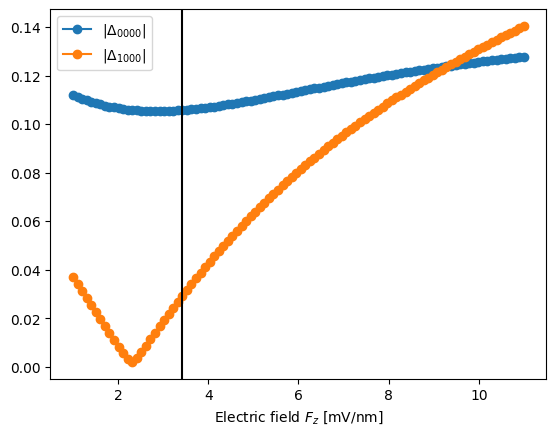

In [43]:
plt.plot(electric_field_sketch, calculated_values[:, :, 0, 0].mean(axis = 1),'-o', label = r'$|\Delta_{0000}|$')
plt.plot(electric_field_sketch, calculated_values[:, :, 1, 0].mean(axis = 1),'-o', label = r'$|\Delta_{1000}|$')
plt.axvline( x = min_value, color = 'k')

plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.legend()

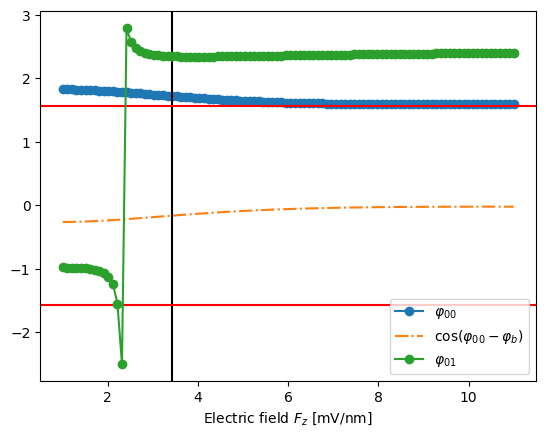

In [44]:
plt.plot(electric_field_sketch, calculated_values[:, :, 0, 1].mean(axis = 1),'-o', label = r'$\varphi_{00}$')
plt.plot(electric_field_sketch, np.cos(calculated_values[:, :, 0, 1]-calculated_values[:, :, 2, 1]).mean(axis = 1),'-.', label = r'$\cos(\varphi_{00}-\varphi_b)$')
plt.axvline( x = min_value, color = 'k')
plt.axhline( y = np.pi/2, color = 'red')
plt.axhline( y = -np.pi/2, color = 'red')

plt.plot(electric_field_sketch, calculated_values[:, :, 1, 1].mean(axis = 1),'-o', label = r'$\varphi_{01}$')

plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.legend()

**2-5-4 Calculate $\gamma (\phi_{01}, \phi_{00})$**

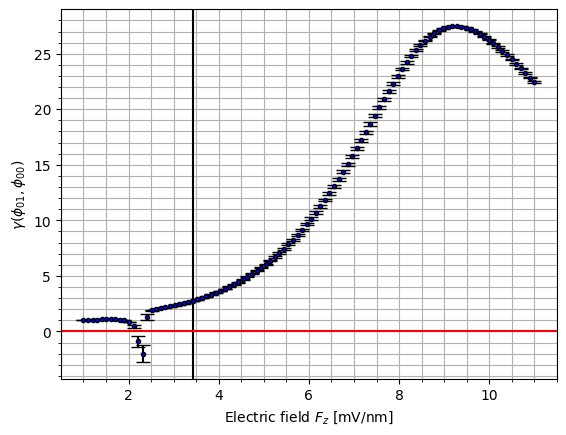

In [45]:
phi_00 = calculated_values[:, :, 0, 1]
phi_01 = calculated_values[:, :, 1, 1]

gamma = - np.sin(phi_01)**2 + np.tan(phi_00)*np.cos(phi_01)*np.sin(phi_01)
gamma_mean = gamma.mean(axis = 1)
gamma_std = gamma.std(axis =1)

plt.minorticks_on()
plt.axvline( x = min_value, color = 'k')

plt.errorbar(electric_field_sketch, gamma_mean, yerr=[gamma_std , gamma_std], fmt='.', capsize=5, capthick=1,ecolor='black', markerfacecolor='blue', markeredgecolor='black')
plt.axhline(y =0, color='red')
# plt.plot(electric_field_sketch, gamma_std)
plt.ylabel(r'$\gamma(\phi_{01}, \phi_{00})$')
plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.grid(which = 'both')
plt.show()


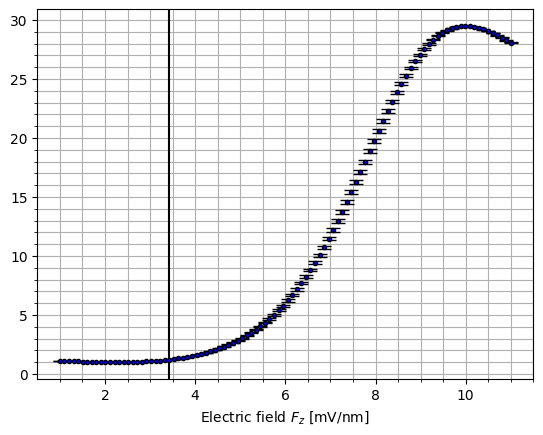

In [46]:
braket = 1 + gamma * calculated_values[:, :, 1, 0]**2/calculated_values[:, :, 0, 0]**2

plt.minorticks_on()
plt.axvline( x = min_value, color = 'k')

plt.errorbar(electric_field_sketch, braket.mean(axis = 1), yerr=[braket.std(axis = 1) , braket.std(axis = 1)], fmt='.', capsize=5, capthick=1,ecolor='black', markerfacecolor='blue', markeredgecolor='black')
# plt.axhline(y =0, color='red')
# plt.plot(electric_field_sketch, gamma_std)
# plt.ylabel(r'$\gamma(\phi_{01}, \phi_{00})$')
plt.xlabel('Electric field '+r'$F_z$'+' [mV/nm]')
plt.grid(which = 'both')
plt.show()
